# Confirm Operator Order - MiniZephyr

Brendan Smithyman | November 2015

This notebook confirms second-order accuracy in the forward modelling operator.

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from zephyr.backend import MiniZephyr, SparseKaiserSource, AnalyticalHelmholtz

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [4]:
systemConfig = {
    'c':        2000.,  # m/s
    'rho':      1.,     # kg/m^3
    'freq':     10.,    # Hz
}

dx = np.arange(5,15,1)
mxz = 1000.
bound = 250.
sloc = np.array([[500.,500.]])

In [5]:
def getError(dx):
    
    sc = {key: systemConfig[key] for key in systemConfig}
    sc.update({
            'dx': dx,
            'nx': np.floor(mxz / dx),
            'nz': np.floor(mxz / dx),
            'nPML': np.floor(bound / dx)
        })
    
    MZ = MiniZephyr(sc)
    AH = AnalyticalHelmholtz(sc)
    SS = SparseKaiserSource(sc)
    
    q = SS(sloc)
    uMZ = MZ*q
    uAH = AH(sloc)
    uDiff = (uAH - uMZ)#[inside/dx:-inside/dx,inside/dx:-inside/dx]
    sc['error'] = np.sqrt((uDiff * uDiff.conj()).sum()).real
    
    print('nx: %(nx)4d, nz: %(nz)4d, dx: %(dx)8.3f, error: %(error)8.3e'%sc)

    return sc['error']

In [6]:
err = map(getError, dx)

nx:  200, nz:  200, dx:    5.000, error: 1.320e+03
nx:  166, nz:  166, dx:    6.000, error: 8.305e+02
nx:  142, nz:  142, dx:    7.000, error: 5.662e+02
nx:  125, nz:  125, dx:    8.000, error: 4.050e+02
nx:  111, nz:  111, dx:    9.000, error: 3.053e+02
nx:  100, nz:  100, dx:   10.000, error: 2.275e+02
nx:   90, nz:   90, dx:   11.000, error: 1.136e+02
nx:   83, nz:   83, dx:   12.000, error: 1.437e+02
nx:   76, nz:   76, dx:   13.000, error: 7.123e+01
nx:   71, nz:   71, dx:   14.000, error: 1.052e+02


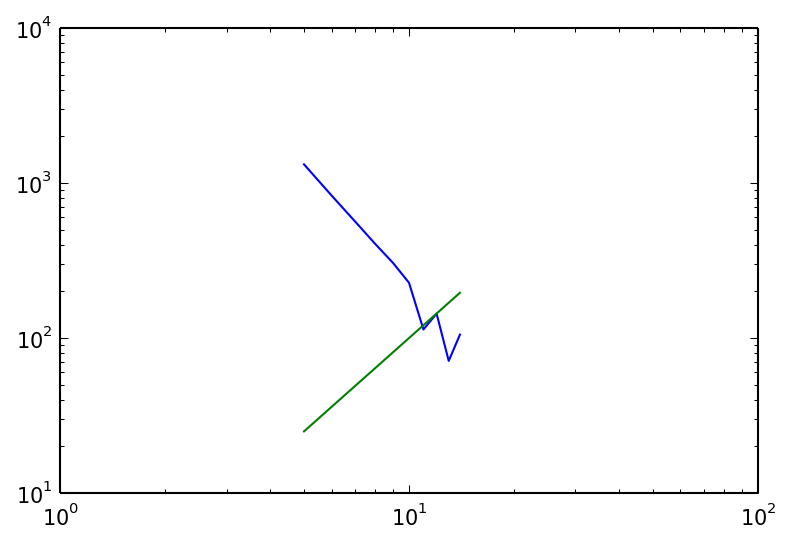

In [7]:
plt.plot(dx, err)
plt.plot(dx, dx**2)
ax = plt.axes()
ax.set_yscale('log')
ax.set_xscale('log')